In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading in the dataset
letter_p1_df = pd.read_csv('letter-recognition.data',names=['letter','x_box','y_box','width_box','height_box','total_pixel','xbar','ybar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'])
letter_p1_clean = letter_p1_df['letter'].copy()
letter_p1_clean[letter_p1_clean != 'O'] = 0
letter_p1_clean[letter_p1_clean == 'O'] = 1
#Dropping the original letter column in order to add it back at the end
letter_p1_df = letter_p1_df.drop('letter',axis=1)
letter_p1_df['letter'] = letter_p1_clean
letter_p1_df['letter'] = letter_p1_df['letter'].astype(str).astype(int)
letter_p1_df

,x_box,y_box,width_box,height_box,total_pixel,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,0
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,0
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,0
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,0
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,0
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,0
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,0
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,0


In [3]:
# Checking if there are null values in the dataset
letter_p1_df.isnull().values.any()

False

In [4]:
from sklearn.preprocessing import MinMaxScaler
#Scaling Continuous variables
scaler = MinMaxScaler()
letter_p1_scaled_df = letter_p1_df.copy()
letter_p1_scaled_df[['x_box','y_box','width_box','height_box','total_pixel','xbar','ybar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']] = scaler.fit_transform(letter_p1_scaled_df[['x_box','y_box','width_box','height_box','total_pixel','xbar','ybar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']])
letter_p1_scaled_df

,x_box,y_box,width_box,height_box,total_pixel,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,letter
0,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333,0
1,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667,0
2,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000,0
3,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333,0
4,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667,0
19996,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667,0
19997,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667,0
19998,0.133333,0.200000,0.266667,0.133333,0.066667,0.533333,0.466667,0.133333,0.400000,0.666667,0.400000,0.533333,0.066667,0.600000,0.333333,0.533333,0


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

lg_accuracy_train = []
lg_roc_auc_train = []
lg_f1_train = []
lg_precision_train = []

lg_accuracy_test = []
lg_roc_auc_test = []
lg_f1_test = []
lg_precision_test = []

lg_Y_pred_list = []
lg_Y_test_list = []

C_val = [1e-8,1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]

# 5 Trials
for i in range(10):
    #Random 5000 per trial
    letter_p1_shuffle_df = letter_p1_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = letter_p1_shuffle_df.iloc[:5000,0:-1],letter_p1_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = letter_p1_shuffle_df.iloc[:5000,-1],letter_p1_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    pipe = Pipeline([('classifier', LogisticRegression())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': C_val},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','sag','newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': C_val}
                ]

    # Create grid search 
    clf_lg = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    best_model = clf_lg.fit(X_train, Y_train)
    
    # Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        heat_results = pd.DataFrame( best_model.cv_results_['params'])
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    heat_results['score_acc_'+ str(i+1)] = 1 - best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_lg_1 = pipe.set_params(**best_acc_param)
    acc_lg = acc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ACC Trial #',i,':',acc_lg.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    lg_accuracy_train.append(acc_lg.score(X_train,Y_train))
    print('LG_ACC Test #',i,':',acc_lg.score(X_test,Y_test)) # Testing Scores
    lg_accuracy_test.append(acc_lg.score(X_test,Y_test))
    
    roc_auc_lg_1 = pipe.set_params(**best_roc_auc_param)
    roc_auc_lg = roc_auc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    lg_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1]))
    print('LG_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1])) # Testing Scores
    lg_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1]))                            
 
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    #Appending each trial together to see the overall ROC curve
    lg_Y_pred_list.append(roc_auc_lg.predict_proba(X_test)[:,1])
    lg_Y_test_list.append(Y_test)
                             
    f1_lg_1 = pipe.set_params(**best_f1_param)
    f1_lg = f1_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('LG_F1 Trial #',i,':', f1_score(Y_train,f1_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_f1_train.append(f1_score(Y_train,f1_lg.predict(X_train)))                        
    print('LG_F1 Test #',i,':',f1_score(Y_test,f1_lg.predict(X_test))) # Testing Scores
    lg_f1_test.append(f1_score(Y_test,f1_lg.predict(X_test)))                             
                             
    precision_lg_1 =pipe.set_params(**best_precision_param)
    precision_lg =  precision_lg_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('LG_Precision Trial #',i,':',average_precision_score(Y_train,precision_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_precision_train.append(average_precision_score(Y_train,precision_lg.predict(X_train)))
    print('LG_Precision Test #',i,':',average_precision_score(Y_test,precision_lg.predict(X_test))) # Testing Scores
    lg_precision_test.append(average_precision_score(Y_test,precision_lg.predict(X_test)))             

LG_ACC Trial # 0 : 0.9614
LG_ACC Test # 0 : 0.9626666666666667
LG_ROC_AUC_OVR Trial # 0 : 0.8547498197253357
LG_ROC_AUC Test # 0 : 0.8488888751483974
LG_F1 Trial # 0 : 0.0
LG_F1 Test # 0 : 0.0
LG_Precision Trial # 0 : 0.0386
LG_Precision Test # 0 : 0.037333333333333336
LG_ACC Trial # 1 : 0.9622
LG_ACC Test # 1 : 0.9624
LG_ROC_AUC_OVR Trial # 1 : 0.8651579988100462
LG_ROC_AUC Test # 1 : 0.843305079499832
LG_F1 Trial # 1 : 0.0
LG_F1 Test # 1 : 0.0
LG_Precision Trial # 1 : 0.0378
LG_Precision Test # 1 : 0.0376
LG_ACC Trial # 2 : 0.9622
LG_ACC Test # 2 : 0.9624
LG_ROC_AUC_OVR Trial # 2 : 0.8576916435989395
LG_ROC_AUC Test # 2 : 0.8573388976337722
LG_F1 Trial # 2 : 0.0
LG_F1 Test # 2 : 0.0
LG_Precision Trial # 2 : 0.0378
LG_Precision Test # 2 : 0.0376
LG_ACC Trial # 3 : 0.9602
LG_ACC Test # 3 : 0.9630666666666666
LG_ROC_AUC_OVR Trial # 3 : 0.8648836768721759
LG_ROC_AUC Test # 3 : 0.8477779316073655
LG_F1 Trial # 3 : 0.0
LG_F1 Test # 3 : 0.0
LG_Precision Trial # 3 : 0.0398
LG_Precision Test 

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

svm_accuracy_train = []
svm_roc_auc_train = []
svm_f1_train = []
svm_precision_train = []

svm_accuracy_test = []
svm_roc_auc_test = []
svm_f1_test = []
svm_precision_test = []

svm_Y_pred_list = []
svm_Y_test_list = []

C_val_svm = [1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]

for i in range(10):
    #Random 5000 per trial
    letter_p1_shuffle_df = letter_p1_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = letter_p1_shuffle_df.iloc[:5000,0:-1],letter_p1_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = letter_p1_shuffle_df.iloc[:5000,-1],letter_p1_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    svm_pipe = Pipeline([('svm_classifier', SVC())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    svm_search_space = [{'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['poly'],
                 'svm_classifier__degree': [2,3],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['linear'],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['rbf'],
                 'svm_classifier__gamma': [.001,.005,.01,.05,.1,.5,1,2],
                 'svm_classifier__C': C_val_svm}
                ]
        
    # Create grid search 
    clf_svm = GridSearchCV(svm_pipe, svm_search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    svm_best_model = clf_svm.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        svm_heat_results = pd.DataFrame( svm_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    svm_heat_results['score_acc_'+ str(i+1)] = 1 - svm_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = svm_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    svm_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_svm_1 = svm_pipe.set_params(**best_acc_param)
    acc_svm = acc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ACC Trial #',i,':',acc_svm.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    svm_accuracy_train.append(acc_svm.score(X_train,Y_train))
    print('SVM_ACC Test #',i,':',acc_svm.score(X_test,Y_test)) # Testing Scores
    svm_accuracy_test.append(acc_svm.score(X_test,Y_test))
    
    roc_auc_svm_1 = svm_pipe.set_params(**best_roc_auc_param)
    roc_auc_svm = roc_auc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train)))
    print('SVM_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test))) # Testing Scores
    svm_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test)))                            
    
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    svm_Y_pred_list.append(roc_auc_svm.decision_function(X_test))
    svm_Y_test_list.append(Y_test)
                             
    f1_svm_1 = svm_pipe.set_params(**best_f1_param)
    f1_svm = f1_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('SVM_F1 Trial #',i,':', f1_score(Y_train,f1_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_f1_train.append(f1_score(Y_train,f1_svm.predict(X_train)))                        
    print('SVM_F1 Test #',i,':',f1_score(Y_test,f1_svm.predict(X_test))) # Testing Scores
    svm_f1_test.append(f1_score(Y_test,f1_svm.predict(X_test)))                             
                             
    precision_svm_1 = svm_pipe.set_params(**best_precision_param)
    precision_svm =  precision_svm_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('SVM_Precision Trial #',i,':',average_precision_score(Y_train,precision_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_precision_train.append(average_precision_score(Y_train,precision_svm.predict(X_train)))
    print('SVM_Precision Test #',i,':',average_precision_score(Y_test,precision_svm.predict(X_test))) # Testing Scores
    svm_precision_test.append(average_precision_score(Y_test,precision_svm.predict(X_test)))  

SVM_ACC Trial # 0 : 0.9994
SVM_ACC Test # 0 : 0.9941333333333333
SVM_ROC_AUC_OVR Trial # 0 : 0.9999945836799778
SVM_ROC_AUC Test # 0 : 0.9984110423850833
SVM_F1 Trial # 0 : 0.9921671018276764
SVM_F1 Test # 0 : 0.9222614840989399
SVM_Precision Trial # 0 : 0.15359166666666668
SVM_Precision Test # 0 : 0.12834081996434937
SVM_ACC Trial # 1 : 0.9984
SVM_ACC Test # 1 : 0.9895333333333334
SVM_ROC_AUC_OVR Trial # 1 : 0.9999988946074531
SVM_ROC_AUC Test # 1 : 0.9920693005876204
SVM_F1 Trial # 1 : 0.9787234042553191
SVM_F1 Test # 1 : 0.8596961572832887
SVM_Precision Trial # 1 : 0.45731421663442945
SVM_Precision Test # 1 : 0.4295294844781571
SVM_ACC Trial # 2 : 1.0
SVM_ACC Test # 2 : 0.9924666666666667
SVM_ROC_AUC_OVR Trial # 2 : 1.0
SVM_ROC_AUC Test # 2 : 0.996623697898996
SVM_F1 Trial # 2 : 1.0
SVM_F1 Test # 2 : 0.8981064021641118
SVM_Precision Trial # 2 : 0.22789502762430938
SVM_Precision Test # 2 : 0.2331972027972028
SVM_ACC Trial # 3 : 1.0
SVM_ACC Test # 3 : 0.9902
SVM_ROC_AUC_OVR Trial # 3 

In [7]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn_accuracy_train = []
knn_roc_auc_train = []
knn_f1_train = []
knn_precision_train = []

knn_accuracy_test = []
knn_roc_auc_test = []
knn_f1_test = []
knn_precision_test = []

knn_Y_pred_list = []
knn_Y_test_list = []

K_Vals = np.linspace(1,105,26,dtype=int)
weights_list = ['uniform','distance']

for i in range(10):
    #Random 5000 per trial
    letter_p1_shuffle_df = letter_p1_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = letter_p1_shuffle_df.iloc[:5000,0:-1],letter_p1_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = letter_p1_shuffle_df.iloc[:5000,-1],letter_p1_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    knn_pipe = Pipeline([('knn_classifier', KNeighborsClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    knn_param = {'knn_classifier':[KNeighborsClassifier()],
                 'knn_classifier__n_neighbors':K_Vals,
                 'knn_classifier__weights':weights_list,
                 'knn_classifier__metric':['euclidean']}
        
    # Create grid search 
    clf_knn = GridSearchCV(knn_pipe, knn_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    knn_best_model = clf_knn.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        knn_heat_results = pd.DataFrame( knn_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    knn_heat_results['score_acc_'+ str(i+1)] = 1 - knn_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = knn_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    knn_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_precision'])])
    
    # Creating KNN based on best parameters
    acc_knn_1 = knn_pipe.set_params(**best_acc_param)
    acc_knn = acc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ACC Trial #',i,':',acc_knn.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    knn_accuracy_train.append(acc_knn.score(X_train,Y_train))
    print('KNN_ACC Test #',i,':',acc_knn.score(X_test,Y_test)) # Testing Scores
    knn_accuracy_test.append(acc_knn.score(X_test,Y_test))
    
    roc_auc_knn_1 = knn_pipe.set_params(**best_roc_auc_param)
    roc_auc_knn = roc_auc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    knn_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1]))
    print('KNN_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1])) # Testing Scores
    knn_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    knn_Y_pred_list.append(roc_auc_knn.predict_proba(X_test)[:,1])
    knn_Y_test_list.append(Y_test)

    f1_knn_1 = knn_pipe.set_params(**best_f1_param)
    f1_knn = f1_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('KNN_F1 Trial #',i,':', f1_score(Y_train,f1_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_f1_train.append(f1_score(Y_train,f1_knn.predict(X_train)))                        
    print('KNN_F1 Test #',i,':',f1_score(Y_test,f1_knn.predict(X_test))) # Testing Scores
    knn_f1_test.append(f1_score(Y_test,f1_knn.predict(X_test)))                             
                             
    precision_knn_1 = knn_pipe.set_params(**best_precision_param)
    precision_knn =  precision_knn_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('KNN_Precision Trial #',i,':',average_precision_score(Y_train,precision_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_precision_train.append(average_precision_score(Y_train,precision_knn.predict(X_train)))
    print('KNN_Precision Test #',i,':',average_precision_score(Y_test,precision_knn.predict(X_test))) # Testing Scores
    knn_precision_test.append(average_precision_score(Y_test,precision_knn.predict(X_test)))
  

KNN_ACC Trial # 0 : 1.0
KNN_ACC Test # 0 : 0.9916
KNN_ROC_AUC_OVR Trial # 0 : 1.0
KNN_ROC_AUC Test # 0 : 0.9956251574013019
KNN_F1 Trial # 0 : 1.0
KNN_F1 Test # 0 : 0.8898601398601398
KNN_Precision Trial # 0 : 0.28651378388697973
KNN_Precision Test # 0 : 0.3472554155985468
KNN_ACC Trial # 1 : 1.0
KNN_ACC Test # 1 : 0.9903333333333333
KNN_ROC_AUC_OVR Trial # 1 : 1.0
KNN_ROC_AUC Test # 1 : 0.9946026833714772
KNN_F1 Trial # 1 : 1.0
KNN_F1 Test # 1 : 0.8733624454148471
KNN_Precision Trial # 1 : 1.0
KNN_Precision Test # 1 : 0.3432033412795317
KNN_ACC Trial # 2 : 1.0
KNN_ACC Test # 2 : 0.9895333333333334
KNN_ROC_AUC_OVR Trial # 2 : 1.0
KNN_ROC_AUC Test # 2 : 0.995605516435268
KNN_F1 Trial # 2 : 1.0
KNN_F1 Test # 2 : 0.857402361489555
KNN_Precision Trial # 2 : 1.0
KNN_Precision Test # 2 : 0.48111192262139757
KNN_ACC Trial # 3 : 1.0
KNN_ACC Test # 3 : 0.9899333333333333
KNN_ROC_AUC_OVR Trial # 3 : 1.0
KNN_ROC_AUC Test # 3 : 0.9938158905126018
KNN_F1 Trial # 3 : 1.0
KNN_F1 Test # 3 : 0.87105038

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_accuracy_train = []
dt_roc_auc_train = []
dt_f1_train = []
dt_precision_train = []

dt_accuracy_test = []
dt_roc_auc_test = []
dt_f1_test = []
dt_precision_test = []

dt_Y_pred_list = []
dt_Y_test_list = []

for i in range(10):
    #Random 5000 per trial
    letter_p1_shuffle_df = letter_p1_scaled_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = letter_p1_shuffle_df.iloc[:5000,0:-1],letter_p1_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = letter_p1_shuffle_df.iloc[:5000,-1],letter_p1_shuffle_df.iloc[5000:,-1]

    # https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    dt_pipe = Pipeline([('dt_classifier', DecisionTreeClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    dt_param = {'dt_classifier':[DecisionTreeClassifier()],
                 'dt_classifier__criterion': ['gini','entropy'],
                 'dt_classifier__ccp_alpha': [.000,.005,.010,.015,.020,.030,.035],
                 'dt_classifier__max_depth':[1,2,3,4,5,6,7,8,9],
               }
    #Locally weighted not necessary - EC
    #Radius Neighbors classifier - EC
    
    # Create grid search 
    clf_dt = GridSearchCV(dt_pipe, dt_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    dt_best_model = clf_dt.fit(X_train, Y_train)
  
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        dt_heat_results = pd.DataFrame( dt_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    dt_heat_results['score_acc_'+ str(i+1)] = 1 - dt_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = dt_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    dt_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_precision'])])
    
    # Creating DT based on best parameters
    acc_dt_1 = dt_pipe.set_params(**best_acc_param)
    acc_dt = acc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ACC Trial #',i,':',acc_dt.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    dt_accuracy_train.append(acc_dt.score(X_train,Y_train))
    print('DT_ACC Test #',i,':',acc_dt.score(X_test,Y_test)) # Testing Scores
    dt_accuracy_test.append(acc_dt.score(X_test,Y_test))
    
    roc_auc_dt_1 = dt_pipe.set_params(**best_roc_auc_param)
    roc_auc_dt = roc_auc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    dt_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1]))
    print('DT_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1])) # Testing Scores
    dt_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    dt_Y_pred_list.append(roc_auc_dt.predict_proba(X_test)[:,1])
    dt_Y_test_list.append(Y_test) 
    
    f1_dt_1 = dt_pipe.set_params(**best_f1_param)
    f1_dt = f1_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('DT_F1 Trial #',i,':', f1_score(Y_train,f1_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_f1_train.append(f1_score(Y_train,f1_dt.predict(X_train)))                        
    print('DT_F1 Test #',i,':',f1_score(Y_test,f1_dt.predict(X_test))) # Testing Scores
    dt_f1_test.append(f1_score(Y_test,f1_dt.predict(X_test)))                             
                             
    precision_dt_1 = dt_pipe.set_params(**best_precision_param)
    precision_dt =  precision_dt_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('DT_Precision Trial #',i,':',average_precision_score(Y_train,precision_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_precision_train.append(average_precision_score(Y_train,precision_dt.predict(X_train)))
    print('DT_Precision Test #',i,':',average_precision_score(Y_test,precision_dt.predict(X_test))) # Testing Scores
    dt_precision_test.append(average_precision_score(Y_test,precision_dt.predict(X_test)))

DT_ACC Trial # 0 : 0.9796
DT_ACC Test # 0 : 0.9764666666666667
DT_ROC_AUC_OVR Trial # 0 : 0.9874809893540383
DT_ROC_AUC Test # 0 : 0.9416746829115994
DT_F1 Trial # 0 : 0.8585365853658535
DT_F1 Test # 0 : 0.723089564502876
DT_Precision Trial # 0 : 0.5214889894419306
DT_Precision Test # 0 : 0.44542407446451293
DT_ACC Trial # 1 : 0.9804
DT_ACC Test # 1 : 0.9786666666666667
DT_ROC_AUC_OVR Trial # 1 : 0.9802239746378734
DT_ROC_AUC Test # 1 : 0.9476410886764286
DT_F1 Trial # 1 : 0.9100817438692097
DT_F1 Test # 1 : 0.7202166064981949
DT_Precision Trial # 1 : 0.5118941972920696
DT_Precision Test # 1 : 0.47468998626404557
DT_ACC Trial # 2 : 0.9818
DT_ACC Test # 2 : 0.9786666666666667
DT_ROC_AUC_OVR Trial # 2 : 0.9861720386926539
DT_ROC_AUC Test # 2 : 0.9474366876998457
DT_F1 Trial # 2 : 0.8901098901098902
DT_F1 Test # 2 : 0.7286689419795221
DT_Precision Trial # 2 : 0.5311642076502732
DT_Precision Test # 2 : 0.48054340802501305
DT_ACC Trial # 3 : 0.9978
DT_ACC Test # 3 : 0.9799333333333333
DT_RO

In [9]:
# Creating Arrays to hold mean metric for each trial
# Logistic Regression
lg_accuracy_train
lg_roc_auc_train
lg_f1_train
lg_precision_train

lg_accuracy_test
lg_roc_auc_test
lg_f1_test
lg_precision_test

# SVM
svm_accuracy_train
svm_roc_auc_train
svm_f1_train
svm_precision_train

svm_accuracy_test
svm_roc_auc_test
svm_f1_test
svm_precision_test

#KNN
knn_accuracy_train
knn_roc_auc_train
knn_f1_train
knn_precision_train

knn_accuracy_test
knn_roc_auc_test
knn_f1_test
knn_precision_test

#DT
dt_accuracy_train
dt_roc_auc_train
dt_f1_train
dt_precision_train

dt_accuracy_test
dt_roc_auc_test
dt_f1_test
dt_precision_test

[0.44542407446451293,
 0.47468998626404557,
 0.48054340802501305,
 0.5732391508471117,
 0.4996135456380354,
 0.4401913145400005,
 0.4787318758539918,
 0.4636207265986484,
 0.4791213880713197,
 0.581817905879426]

In [23]:
Training_List = [lg_accuracy_train,svm_accuracy_train,knn_accuracy_train,dt_accuracy_train,lg_roc_auc_train,svm_roc_auc_train,knn_roc_auc_train,dt_roc_auc_train,lg_f1_train,svm_f1_train,knn_f1_train,dt_f1_train,lg_precision_train,svm_precision_train,knn_precision_train,dt_precision_train]

In [24]:
Training_Results = pd.DataFrame(Training_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                                columns=['Training_Trial_1','Training_Trial_2','Training_Trial_3','Training_Trial_4','Training_Trial_5','Training_Trial_6','Training_Trial_7','Training_Trial_8','Training_Trial_9','Training_Trial_10'])
Training_Results.to_csv("letter_p1_training_FINAL.csv")
Training_Results['Training_MEAN'] = Training_Results.mean(axis=1)
Training_Results

,Training_Trial_1,Training_Trial_2,Training_Trial_3,Training_Trial_4,Training_Trial_5,Training_Trial_6,Training_Trial_7,Training_Trial_8,Training_Trial_9,Training_Trial_10,Training_MEAN
LG_ACC,0.961400,0.962200,0.962200,0.960200,0.964200,0.966800,0.963200,0.960600,0.966400,0.962200,0.962940
SVM_ACC,0.999400,0.998400,1.000000,1.000000,0.998400,0.998200,1.000000,0.999600,0.995800,0.995600,0.998540
KNN_ACC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DT_ACC,0.979600,0.980400,0.981800,0.997800,0.993000,0.995400,0.990800,0.980400,0.991000,0.993200,0.988340
LG_ROC_AUC,0.854750,0.865158,0.857692,0.864884,0.867981,0.849966,0.865364,0.860584,0.855700,0.865456,0.860753
SVM_ROC_AUC,0.999995,0.999999,1.000000,0.999998,0.999913,0.999826,1.000000,0.999897,0.999502,0.999877,0.999901
KNN_ROC_AUC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DT_ROC_AUC,0.987481,0.980224,0.986172,0.978372,0.947152,0.980376,0.977766,0.974085,0.982985,0.971847,0.976646
LG_F1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SVM_F1,0.992167,0.978723,1.000000,1.000000,0.976744,1.000000,1.000000,0.994975,0.977556,0.959128,0.987929


In [25]:
Testing_List = [lg_accuracy_test,svm_accuracy_test,knn_accuracy_test,dt_accuracy_test,lg_roc_auc_test,svm_roc_auc_test,knn_roc_auc_test,dt_roc_auc_test,lg_f1_test,svm_f1_test,knn_f1_test,dt_f1_test,lg_precision_test,svm_precision_test,knn_precision_test,dt_precision_test]

In [26]:
Testing_Results = pd.DataFrame(Testing_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                               columns=['Test_Trial_1','Test_Trial_2','Test_Trial_3','Test_Trial_4','Test_Trial_5','Test_Trial_6','Test_Trial_7','Test_Trial_8','Test_Trial_9','Test_Trial_10'])
Testing_Results.to_csv("letter_p1_testing_FINAL.csv")
Testing_Results['Test_MEAN'] = Testing_Results.mean(axis=1)
Testing_Results

,Test_Trial_1,Test_Trial_2,Test_Trial_3,Test_Trial_4,Test_Trial_5,Test_Trial_6,Test_Trial_7,Test_Trial_8,Test_Trial_9,Test_Trial_10,Test_MEAN
LG_ACC,0.962667,0.962400,0.962400,0.963067,0.961733,0.960867,0.962067,0.962933,0.961000,0.962400,0.962153
SVM_ACC,0.994133,0.989533,0.992467,0.990200,0.992133,0.991533,0.992667,0.992200,0.991067,0.990333,0.991627
KNN_ACC,0.991600,0.990333,0.989533,0.989933,0.992067,0.991333,0.992333,0.992200,0.988400,0.991067,0.990880
DT_ACC,0.976467,0.978667,0.978667,0.979933,0.978067,0.974533,0.982200,0.978667,0.979467,0.979000,0.978567
LG_ROC_AUC,0.848889,0.843305,0.857339,0.847778,0.860300,0.858038,0.845882,0.846952,0.835655,0.851177,0.849531
SVM_ROC_AUC,0.998411,0.992069,0.996624,0.996793,0.997090,0.996130,0.996892,0.997613,0.997214,0.997797,0.996663
KNN_ROC_AUC,0.995625,0.994603,0.995606,0.993816,0.997208,0.995558,0.995366,0.995337,0.996189,0.995439,0.995475
DT_ROC_AUC,0.941675,0.947641,0.947437,0.948047,0.904586,0.938308,0.951303,0.933617,0.951916,0.946148,0.941068
LG_F1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SVM_F1,0.922261,0.859696,0.898106,0.872727,0.896127,0.872958,0.903226,0.893345,0.902703,0.898320,0.891947


In [14]:
from scipy import stats
stats.ttest_ind(lg_accuracy_train,svm_accuracy_train)

Ttest_indResult(statistic=-40.341256320720724, pvalue=4.1820819210802136e-19)

,classifier,C,penalty,solver,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"LogisticRegression(C=1e-08, max_iter=5000, pen...",1.000000e-08,l1,saga,0.0386,0.0378,0.0378,0.0398,0.0358,0.0332,0.0368,0.0394,0.0336,0.0378,0.03706
1,"LogisticRegression(C=1e-08, max_iter=5000, pen...",1.000000e-08,l2,saga,0.0386,0.0378,0.0378,0.0398,0.0358,0.0332,0.0368,0.0394,0.0336,0.0378,0.03706
2,"LogisticRegression(C=1e-08, max_iter=5000, pen...",1.000000e-07,l1,saga,0.0386,0.0378,0.0378,0.0398,0.0358,0.0332,0.0368,0.0394,0.0336,0.0378,0.03706
3,"LogisticRegression(C=1e-08, max_iter=5000, pen...",1.000000e-07,l2,saga,0.0386,0.0378,0.0378,0.0398,0.0358,0.0332,0.0368,0.0394,0.0336,0.0378,0.03706
4,"LogisticRegression(C=1e-08, max_iter=5000, pen...",1.000000e-06,l1,saga,0.0386,0.0378,0.0378,0.0398,0.0358,0.0332,0.0368,0.0394,0.0336,0.0378,0.03706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"LogisticRegression(C=0.1, max_iter=5000)",1.000000e+03,l2,sag,0.0394,0.0396,0.0386,0.0404,0.0364,0.0332,0.0378,0.0402,0.0336,0.0390,0.03782
61,"LogisticRegression(C=0.1, max_iter=5000)",1.000000e+03,l2,newton-cg,0.0394,0.0396,0.0386,0.0404,0.0364,0.0332,0.0378,0.0402,0.0336,0.0390,0.03782
62,"LogisticRegression(C=0.1, max_iter=5000)",1.000000e+04,l2,lbfgs,0.0394,0.0396,0.0386,0.0404,0.0366,0.0332,0.0378,0.0402,0.0336,0.0390,0.03784
63,"LogisticRegression(C=0.1, max_iter=5000)",1.000000e+04,l2,sag,0.0394,0.0396,0.0386,0.0404,0.0366,0.0332,0.0378,0.0402,0.0336,0.0390,0.03784


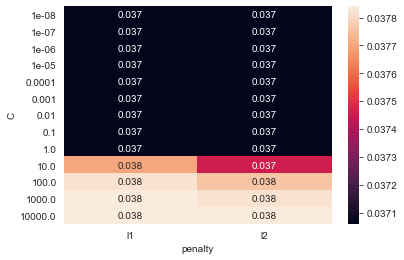

In [15]:
import seaborn as sns; sns.set_style('white')  # plot formatting
# Taking the average of the 5 trials to create 1 heat map based on the averages
heat_results['mean_score_acc'] = heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( heat_results.query('solver=="saga"').pivot('C','penalty','mean_score_acc'),
             annot=True, fmt='.3f')
heat_results

,svm_classifier,C,degree,kernel,gamma,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"SVC(C=0.1, kernel='poly')",1.000000e-07,2.0,poly,NaN,0.0384,0.0376,0.0362,0.0380,0.0344,0.0418,0.0352,0.0396,0.0398,0.0370,0.03780
1,"SVC(C=0.1, kernel='poly')",1.000000e-07,3.0,poly,NaN,0.0384,0.0376,0.0362,0.0380,0.0344,0.0418,0.0352,0.0396,0.0398,0.0370,0.03780
2,"SVC(C=0.1, kernel='poly')",1.000000e-06,2.0,poly,NaN,0.0384,0.0376,0.0362,0.0380,0.0344,0.0418,0.0352,0.0396,0.0398,0.0370,0.03780
3,"SVC(C=0.1, kernel='poly')",1.000000e-06,3.0,poly,NaN,0.0384,0.0376,0.0362,0.0380,0.0344,0.0418,0.0352,0.0396,0.0398,0.0370,0.03780
4,"SVC(C=0.1, kernel='poly')",1.000000e-05,2.0,poly,NaN,0.0384,0.0376,0.0362,0.0380,0.0344,0.0418,0.0352,0.0396,0.0398,0.0370,0.03780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.05,0.0218,0.0182,0.0192,0.0188,0.0168,0.0176,0.0228,0.0176,0.0226,0.0186,0.01940
117,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.10,0.0160,0.0144,0.0132,0.0148,0.0122,0.0110,0.0160,0.0126,0.0144,0.0128,0.01374
118,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,0.50,0.0106,0.0084,0.0102,0.0114,0.0090,0.0100,0.0084,0.0082,0.0112,0.0108,0.00982
119,"SVC(C=100.0, gamma=2)",1.000000e+03,NaN,rbf,1.00,0.0114,0.0118,0.0106,0.0110,0.0102,0.0112,0.0088,0.0098,0.0124,0.0138,0.01110


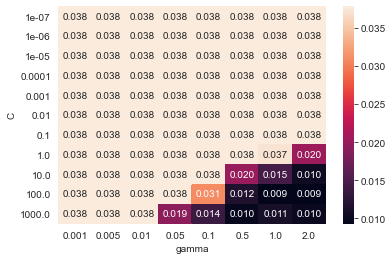

In [16]:
svm_heat_results['mean_score_acc'] = svm_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)
# lets show the results for the saga solver across penalty & C values
sns.heatmap( svm_heat_results.query('kernel=="rbf"').pivot('C','gamma','mean_score_acc'),
             annot=True, fmt='.3f')
svm_heat_results

,knn_classifier,metric,n_neighbors,weights,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,uniform,0.0110,0.0094,0.0114,0.0100,0.0094,0.0098,0.0084,0.0158,0.0114,0.0126,0.01092
1,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,distance,0.0110,0.0094,0.0114,0.0100,0.0094,0.0098,0.0084,0.0158,0.0114,0.0126,0.01092
2,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,uniform,0.0128,0.0126,0.0118,0.0128,0.0118,0.0116,0.0116,0.0162,0.0110,0.0140,0.01262
3,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,distance,0.0120,0.0122,0.0108,0.0118,0.0114,0.0114,0.0112,0.0158,0.0104,0.0136,0.01206
4,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,uniform,0.0126,0.0138,0.0130,0.0152,0.0134,0.0130,0.0158,0.0186,0.0140,0.0190,0.01484
5,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,distance,0.0118,0.0130,0.0126,0.0140,0.0122,0.0124,0.0140,0.0176,0.0122,0.0168,0.01366
6,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,uniform,0.0148,0.0160,0.0138,0.0160,0.0168,0.0150,0.0172,0.0182,0.0160,0.0194,0.01632
7,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,distance,0.0140,0.0140,0.0132,0.0144,0.0152,0.0132,0.0154,0.0164,0.0144,0.0162,0.01464
8,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,uniform,0.0158,0.0162,0.0164,0.0162,0.0180,0.0158,0.0180,0.0196,0.0184,0.0194,0.01738
9,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,distance,0.0146,0.0152,0.0144,0.0150,0.0154,0.0136,0.0162,0.0174,0.0162,0.0168,0.01548


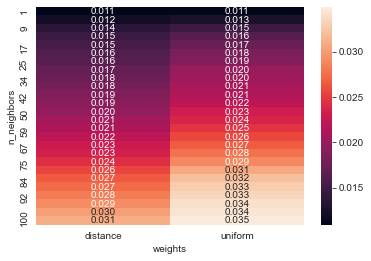

In [17]:
knn_heat_results['mean_score_acc'] = knn_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( knn_heat_results.pivot('n_neighbors','weights','mean_score_acc'),
             annot=True, fmt='.3f')
knn_heat_results

,dt_classifier,ccp_alpha,criterion,max_depth,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,1,0.0390,0.0376,0.0366,0.0356,0.0330,0.0316,0.0416,0.0392,0.0384,0.0348,0.03674
1,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,2,0.0390,0.0376,0.0366,0.0356,0.0330,0.0316,0.0416,0.0392,0.0384,0.0348,0.03674
2,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,3,0.0386,0.0376,0.0366,0.0362,0.0330,0.0312,0.0422,0.0390,0.0384,0.0344,0.03672
3,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,4,0.0332,0.0308,0.0374,0.0314,0.0336,0.0322,0.0402,0.0374,0.0340,0.0326,0.03428
4,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.000,gini,5,0.0258,0.0252,0.0334,0.0252,0.0336,0.0298,0.0384,0.0288,0.0284,0.0236,0.02922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.035,gini,5,0.0390,0.0376,0.0366,0.0356,0.0330,0.0316,0.0416,0.0392,0.0384,0.0348,0.03674
113,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.035,gini,6,0.0390,0.0376,0.0366,0.0356,0.0330,0.0316,0.0416,0.0392,0.0384,0.0348,0.03674
114,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.035,gini,7,0.0390,0.0376,0.0366,0.0356,0.0330,0.0316,0.0416,0.0392,0.0384,0.0348,0.03674
115,"DecisionTreeClassifier(ccp_alpha=0.005, criter...",0.035,gini,8,0.0390,0.0376,0.0366,0.0356,0.0330,0.0316,0.0416,0.0392,0.0384,0.0348,0.03674


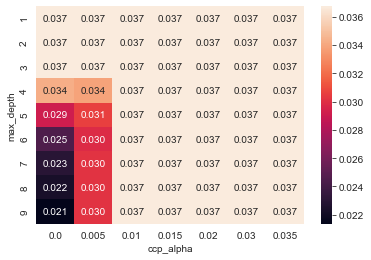

In [18]:
dt_heat_results['mean_score_acc'] = dt_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
dt_cleaned = dt_heat_results.drop_duplicates(['max_depth','ccp_alpha'])
sns.heatmap( dt_cleaned.pivot('max_depth','ccp_alpha','mean_score_acc'),
             annot=True, fmt='.3f')
dt_cleaned

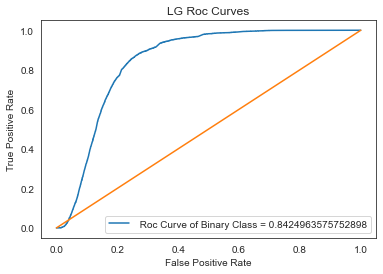

In [19]:
#https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
from sklearn.metrics import roc_curve, auc
# Concating the list together
lg_Y_test = pd.concat(lg_Y_test_list)
lg_Y_pred = np.concatenate(lg_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(lg_Y_test,lg_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LG Roc Curves")
plt.show()

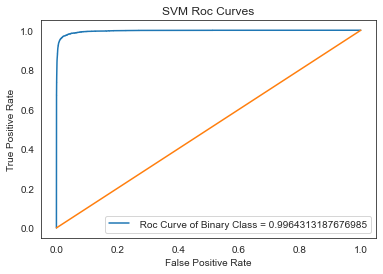

In [20]:
# Concating the list together
svm_Y_test = pd.concat(svm_Y_test_list)
svm_Y_pred = np.concatenate(svm_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(svm_Y_test,svm_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Roc Curves")
plt.show()

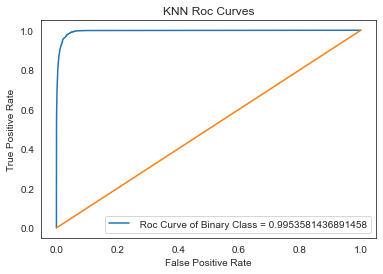

In [21]:
# Concating the list together
knn_Y_test = pd.concat(knn_Y_test_list)
knn_Y_pred = np.concatenate(knn_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(knn_Y_test,knn_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Roc Curves")
plt.show()

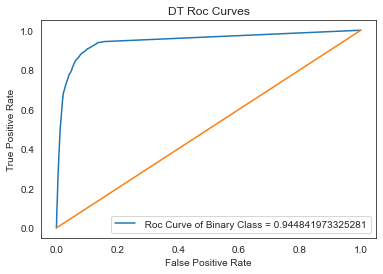

In [22]:
# Concating the list together
dt_Y_test = pd.concat(dt_Y_test_list)
dt_Y_pred = np.concatenate(dt_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(dt_Y_test,dt_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DT Roc Curves")
plt.show()